<a href="https://colab.research.google.com/github/rajni0829/DataScience/blob/main/Fischer's_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AIM : To Implement Fischer’s Linear Discriminant Analysis in Python 



Fischer's LDA Concept : Reduce Dimension by maximizing the distance between means and minimizing within-class variance.


In [ ]:
# Importing Libraries
import matplotlib.pyplot as plt
from sklearn import datasets


In [ ]:
data = datasets.load_iris()
X, y = data.data, data.target
X


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
y


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
import numpy as np

class LDA:
    def __init__(self,n_comp):
        self.n_comp = n_comp
        self.discriminants = None       # to store eigenvectors we compute
        
    def fit(self,X,y):                  
        n_features = X.shape[1]         # .shapes = (no(samples),no(features))
        class_labels = np.unique(y)     # returns uniq labels as list
        
        
        #1. calculating scatter Matrix - in class(S_W)
        mean_overall = np.mean(X,axis = 0)
        S_W = np.zeros((n_features,n_features))               # 4,4
        
        
        #2. calculating scatter Matrix - in class(S_B) 
        S_B = np.zeros((n_features,n_features))               # 4,4
        
        # Finding Sum 
        for c in class_labels:
            X_c = X[y==c]                          
            # getting features only = class labels
            mean_c = np.mean(X_c,axis =0)
            
            # WITHIN SCATTER CLASS MATRIX
            S_W += (X_c - mean_c).T.dot((X_c - mean_c))       #(4,n_c)*(n_c,4) = (4,4)
            
            # BETWEEN CLASS SCATTER
            n_c = X_c.shape[0]
            # (4,1)* (4,1)T = (4,4)
            mean_diff = (mean_c-mean_overall).reshape(n_features,1)   #(4,null)-> (4,1)
            S_B += n_c*(mean_diff).dot(mean_diff.T)
            
        #3. Inverse of Within Class Scatter(S_W).S_B
        A = np.linalg.inv(S_W).dot(S_B)
        
        #4. Now, solving for EVls & EVts
        eigenvalues, eigenvectors = np.linalg.eig(A)
        eigenvectors = eigenvectors.T
        idxs = np.argsort(abs(eigenvalues))[::-1]                     # sorting
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        self.linear_discriminants = eigenvectors[0:self.n_comp]
        
        
    
    def transform(self,X):                             # predict method (same as in PCA) 
        return np.dot(X,self.linear_discriminants.T)   # returns new data we wanna project
    
    
    
        # rules for matrix : last D of 1st matrix = 1st D of 2nd matrix
        # checking for Iris Dateset, therefore (n_features = 150,4)(S_W=4,4)(S_B=4,4)
        

In [ ]:
#5. Projecting the data onto the 2 primary linear discriminants
lda = LDA(2)
lda.fit(X, y)
X_projected = lda.transform(X)

print("Shape of X:", X.shape)
print("Shape of transformed X:", X_projected.shape)


Shape of X: (150, 4)
Shape of transformed X: (150, 2)


In [ ]:
x1, x2 = X_projected[:, 0], X_projected[:, 1]
print(x1,x2)


[-1.49920971 -1.2643595  -1.35525305 -1.18495616 -1.5169559  -1.40864014
 -1.28548339 -1.38431399 -1.12136823 -1.31831374 -1.58367182 -1.28716445
 -1.31422036 -1.37605297 -1.94923317 -1.77516687 -1.63024483 -1.42847467
 -1.50337736 -1.48893461 -1.35700838 -1.3795792  -1.65506386 -1.04356034
 -1.12096094 -1.17443134 -1.18744274 -1.46468272 -1.48146353 -1.18904953
 -1.17130335 -1.32634064 -1.76713997 -1.85304902 -1.2475787  -1.47327677
 -1.63810761 -1.56681676 -1.21538977 -1.40518817 -1.46300166 -0.89518633
 -1.2926305  -1.08459303 -1.19659488 -1.17275028 -1.50426848 -1.2789777
 -1.56279764 -1.40109479  0.89710107  0.98227886  1.138133    1.09925388
  1.17128732  1.14140953  1.14607006  0.58586528  0.97032269  1.02272882
  0.83027492  0.99768699  0.82129822  1.20082982  0.6250528   0.83214047
  1.22651305  0.72534591  1.41023091  0.80426771  1.4650584   0.78090694
  1.49510031  1.0979801   0.84586754  0.89163502  1.14873208  1.41537299
  1.18163669  0.45243343  0.80836109  0.68222488  0.

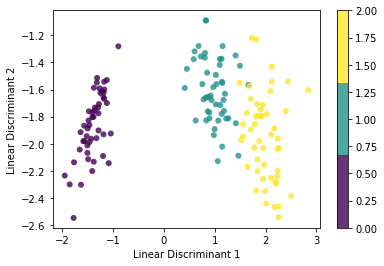

In [ ]:
# Plotting Data After Separation of Classes
plt.scatter(
    x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)
)

plt.xlabel("Linear Discriminant 1")
plt.ylabel("Linear Discriminant 2")
plt.colorbar()
plt.show()


 ### CONCLUSION : Fischer's  Linear Discriminant Analysis has been successfully Implemented.
 